# Stabilization

In [1]:
import PFAS_SAT as ps
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document

The process includes mixing an additive into the soil to which the PFAS will preferentially sorb. The PFAS in the contaminated soil will either be released to surface or ground- water, and the remainder will sorbed to the soil/additive mixture. The flow of PFAS from soil stabilization is modeled using a liquid-solid partition coefficient normalized to the amount of organic carbon, combined with a water balance to track the flow of PFAS through the soil. Model predictions are based on achievement of equilibrium. It is further assumed that the soil and additive are well mixed. The partition coefficient is used to estimate the concentration of PFAS in the liquid and solids. By default, it is assumed that no volatilization occurs, but a user can enter a fraction of PFAS that is volatilized.

The concentration in the liquid changes throughout the year as PFAS is leached to the groundwater (i.e., it is assumed that annual precipitation is uniform throughout the year and continuously removes PFAS from the mixture). The user enters a run-off coefficient based on the soil type, land use, grade, and vegetation. The run-off is assumed to be released to surface water. Another fraction of the precipitation is removed via evapotranspiration (ET) based on the location and vegetation. The remaining precipitation is assumed to leach into groundwater. The PFAS remaining in the soil may be taken up by and bioaccumulate in plants; however, this is outside the scope of the current effort and will depend on how the land is used.

<img src="../Images/ProcessModels/Stabilization.png" alt="Drawing" style="width: 400px;"/>

### Assumptions and Limitations:

1.	The water balance model is averaged over a year and ignores potential effects from intense rains that may lead to substantial additional erosion and loss of solids and associated PFAS.
2.	Volatilization is assumed to be zero by default due to a lack of data. However, the user may assign a fraction of the PFAS to be volatilized.
3.	Future work is required to implement a dynamic (i.e., non-equilibrium) model to account for changes in the organic C content of over time as land-applied materials decompose, and to account for episodic precipitation events. 
4.	Default soil properties reflect representative values for loam and silty clay loams, but the values for different situations are provided and may be input by the user.


## Input Parameters for Stabilization model

In [2]:
Stabilization = ps.Stab()
Stabilization.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,Reference
0,Soil Log partition coefficient,SoilLogPartCoef,PFOA,PFOA Log Koc (soils),2.19,log L/kg OC,NaN
1,Soil Log partition coefficient,SoilLogPartCoef,PFOS,PFOS Log Koc (soils),3.04,log L/kg OC,NaN
2,Soil Log partition coefficient,SoilLogPartCoef,PFBA,PFBA Log Koc (soils),1.88,log L/kg OC,NaN
3,Soil Log partition coefficient,SoilLogPartCoef,PFPeA,PFPeA Log Koc (soils),1.37,log L/kg OC,NaN
4,Soil Log partition coefficient,SoilLogPartCoef,PFHxA,PFHxA Log Koc (soils),1.77,log L/kg OC,NaN
5,Soil Log partition coefficient,SoilLogPartCoef,PFHpA,PFHpA Log Koc (soils),1.97,log L/kg OC,NaN
6,Soil Log partition coefficient,SoilLogPartCoef,PFNA,PFNA Log Koc (soils),2.63,log L/kg OC,NaN
7,Soil Log partition coefficient,SoilLogPartCoef,PFDA,PFDA Log Koc (soils),3.24,log L/kg OC,NaN
8,Soil Log partition coefficient,SoilLogPartCoef,PFBS,PFBS Log Koc (soils),1.51,log L/kg OC,NaN
9,Soil Log partition coefficient,SoilLogPartCoef,PFHxS,PFHxS Log Koc (soils),2.79,log L/kg OC,NaN


## Incoming Contaminated Soil to Stabilization

In [3]:
IncominWaste = ps.IncomFlow()
IncominWaste.set_flow('Contaminated Soil', 1000)
IncominWaste.calc()
ContaminatedSoil = IncominWaste.Inc_flow
ContaminatedSoil.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,850
2,Moisture flow,kg,150
3,Carbon flow,kg,8.5
4,PFOA,μg,1e+06
5,PFOS,μg,1e+06
6,PFBA,μg,1e+06
7,PFPeA,μg,1e+06
8,PFHxA,μg,1e+06
9,PFHpA,μg,1e+06


## PFAS balance in Stabilization (Stabilized soil stay in place)

In [4]:
Stabilization.InputData.Stabil['is_stay_inplace']['amount'] = True
Stabilization.calc(Inc_flow=ContaminatedSoil)
Stabilization.report(normalized=True)

,Volatilized,Remaining in Soil,Leachate,RunOff
PFOA,0.0,99.92,0.01,0.07
PFOS,0.0,99.97,0.00,0.03
PFBA,0.0,67.14,4.69,28.17
PFPeA,0.0,43.04,8.14,48.82
PFHxA,0.0,61.85,5.45,32.70
PFHpA,0.0,71.26,4.11,24.64
PFNA,0.0,91.58,1.20,7.22
PFDA,0.0,97.78,0.32,1.91
PFBS,0.0,49.24,7.25,43.51
PFHxS,0.0,94.00,0.86,5.14


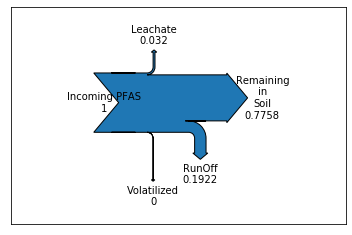

In [5]:
Stabilization.plot_sankey()

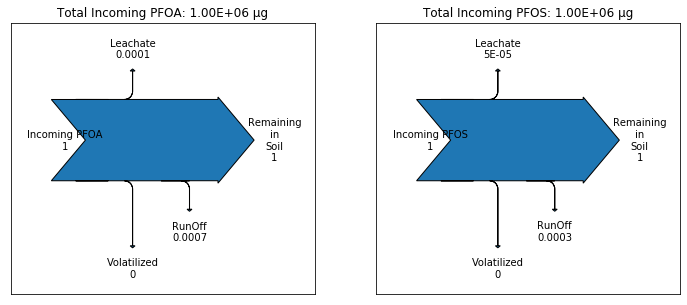

In [6]:
Stabilization.plot_sankey_report(margin = 0.5)

### Sensitivity analysis to precipitation

Text(0, 0.5, 'Percent of Incoming PFAS that \n remains in the Soil (%)')

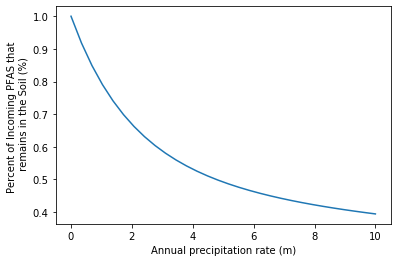

In [7]:
precip = np.linspace(0,10,30)
frac_remain = []
Stabilization.InputData.Stabil['is_stay_inplace']['amount'] = True
for i in precip:
    Stabilization.InputData.Precip['ann_precip']['amount'] = i
    Stabilization.calc(Inc_flow=ContaminatedSoil)
    frac_remain.append(sum(Stabilization.report()['Remaining in Soil'])/sum(ContaminatedSoil.PFAS))

plt.plot(precip,frac_remain)
plt.xlabel('Annual precipitation rate (m)')
plt.ylabel('Percent of Incoming PFAS that \n remains in the Soil (%)')

## PFAS balance in Stabilization (Stabilized soil is transported to landfill)

In [8]:
Stabilization = ps.Stab()
Stabilization.InputData.Stabil['is_stay_inplace']['amount'] = False
Stabilization.calc(Inc_flow=ContaminatedSoil)
Stabilization.report(normalized=True)

,Volatilized,Remaining in Soil,Leachate,RunOff
PFOA,0.0,100.0,0.0,0.0
PFOS,0.0,100.0,0.0,0.0
PFBA,0.0,100.0,0.0,0.0
PFPeA,0.0,100.0,0.0,0.0
PFHxA,0.0,100.0,0.0,0.0
PFHpA,0.0,100.0,0.0,0.0
PFNA,0.0,100.0,0.0,0.0
PFDA,0.0,100.0,0.0,0.0
PFBS,0.0,100.0,0.0,0.0
PFHxS,0.0,100.0,0.0,0.0


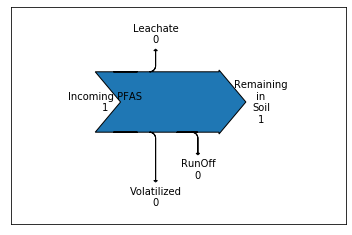

In [9]:
Stabilization.plot_sankey()

In [10]:
Stabilization.Stabilized.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1050.0
1,Solids flow,kg,900.0
2,Moisture flow,kg,150.0
3,Carbon flow,kg,8.5
4,PFOA,μg,1000000.0
5,PFOS,μg,1000000.0
6,PFBA,μg,1000000.0
7,PFPeA,μg,1000000.0
8,PFHxA,μg,1000000.0
9,PFHpA,μg,1000000.0


In [11]:
Stabilization.Stabilized.Additive_mass

50.0

In [12]:
for key, val in Stabilization.Stabilized.AddLogPartCoef.items():
    print('Additive Log K for {}: {} {}'.format(key, val['amount'], val['unit']))

Additive Log K for PFOA: 3.9 log L/kg
Additive Log K for PFOS: 4.3 log L/kg
Additive Log K for PFBA: 0.0 log L/kg
Additive Log K for PFPeA: 0.0 log L/kg
Additive Log K for PFHxA: 0.0 log L/kg
Additive Log K for PFHpA: 0.0 log L/kg
Additive Log K for PFNA: 0.0 log L/kg
Additive Log K for PFDA: 0.0 log L/kg
Additive Log K for PFBS: 0.0 log L/kg
Additive Log K for PFHxS: 0.0 log L/kg
